# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
path = r'D:\CF NHL Project\2 Data'

In [3]:
game_player_stats = pd.read_csv(os.path.join(path, 'Prepared Data', 'game_team_stats_updated.csv'), index_col = False)

In [4]:
#Enable visuals
%matplotlib inline

In [5]:
# Removing rink side data
game_player_stats = game_player_stats.drop(columns = ['Unnamed: 0'])

In [6]:
game_player_stats.head()

,game_id,season,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,venue,venue_time_zone_id,...,team_goals,team_shots,team_hits,team_pim,powerPlayOpportunities,team_powerPlayGoals,faceOffWinPercentage,team_giveaways,team_takeaways,team_blocked
0,2016020045,20162017,2016-10-19T00:30:00Z,4,16,4,7,home win REG,United Center,America/Chicago,...,7,28,20.0,8,3,2,49.1,16.0,8.0,9.0
1,2016020045,20162017,2016-10-19T00:30:00Z,4,16,4,7,home win REG,United Center,America/Chicago,...,7,28,20.0,8,3,2,49.1,16.0,8.0,9.0
2,2016020045,20162017,2016-10-19T00:30:00Z,4,16,4,7,home win REG,United Center,America/Chicago,...,7,28,20.0,8,3,2,49.1,16.0,8.0,9.0
3,2016020045,20162017,2016-10-19T00:30:00Z,4,16,4,7,home win REG,United Center,America/Chicago,...,7,28,20.0,8,3,2,49.1,16.0,8.0,9.0
4,2016020045,20162017,2016-10-19T00:30:00Z,4,16,4,7,home win REG,United Center,America/Chicago,...,7,28,20.0,8,3,2,49.1,16.0,8.0,9.0


In [7]:
game_player_stats.columns

Index(['game_id', 'season', 'date_time_GMT', 'away_team_id', 'home_team_id',
       'away_goals', 'home_goals', 'outcome', 'venue', 'venue_time_zone_id',
       'venue_time_zone_tz', 'player_id', 'firstName', 'lastName',
       'nationality', 'birthCity', 'primaryPosition', 'birthDate', 'height',
       'height_cm', 'weight', 'side_shot_from', 'team_id', 'timeOnIce',
       'assists', 'goals', 'shots', 'hits', 'powerPlayGoals',
       'powerPlayAssists', 'penaltyMinutes', 'faceOffWins', 'faceoffTaken',
       'takeaways', 'giveaways', 'shortHandedGoals', 'shortHandedAssists',
       'blocked', 'plusMinus', 'evenTimeOnIce', 'shortHandedTimeOnIce',
       'powerPlayTimeOnIce', 'franchiseId', 'team_location', 'teamName',
       'state_province', 'abbreviation', 'home_or_away', 'won', 'settled_in',
       'head_coach', 'team_goals', 'team_shots', 'team_hits', 'team_pim',
       'powerPlayOpportunities', 'team_powerPlayGoals', 'faceOffWinPercentage',
       'team_giveaways', 'team_takeaways

In [8]:
#making variable subset
game_player_sub = game_player_stats[['game_id', 'team_id', 'team_goals', 'team_shots', 'team_hits', 'team_pim', 'team_giveaways', 'team_takeaways', 'team_blocked']]

In [9]:
game_player_sub

,game_id,team_id,team_goals,team_shots,team_hits,team_pim,team_giveaways,team_takeaways,team_blocked
0,2016020045,16,7,28,20.0,8,16.0,8.0,9.0
1,2016020045,16,7,28,20.0,8,16.0,8.0,9.0
2,2016020045,16,7,28,20.0,8,16.0,8.0,9.0
3,2016020045,16,7,28,20.0,8,16.0,8.0,9.0
4,2016020045,16,7,28,20.0,8,16.0,8.0,9.0
...,...,...,...,...,...,...,...,...,...
853309,2018030417,6,1,33,28.0,0,13.0,6.0,7.0
853310,2018030417,6,1,33,28.0,0,13.0,6.0,7.0
853311,2018030417,6,1,33,28.0,0,13.0,6.0,7.0
853312,2018030417,6,1,33,28.0,0,13.0,6.0,7.0


In [10]:
game_player_sub.shape

(853314, 9)

In [11]:
game_player_sub_nodup = game_player_sub.drop_duplicates()

In [12]:
game_player_sub_nodup.shape

(47432, 9)

In [13]:
game_player_sub_nodup

,game_id,team_id,team_goals,team_shots,team_hits,team_pim,team_giveaways,team_takeaways,team_blocked
0,2016020045,16,7,28,20.0,8,16.0,8.0,9.0
18,2016020045,4,4,27,30.0,6,12.0,9.0,11.0
36,2017020812,7,3,33,17.0,8,5.0,6.0,14.0
54,2017020812,24,4,34,16.0,6,7.0,4.0,14.0
72,2015020314,21,4,29,17.0,9,13.0,5.0,20.0
...,...,...,...,...,...,...,...,...,...
853224,2018030415,6,1,39,43.0,2,4.0,11.0,15.0
853242,2018030416,19,1,29,29.0,20,12.0,11.0,9.0
853260,2018030416,6,5,32,27.0,10,4.0,10.0,16.0
853278,2018030417,19,4,20,36.0,2,7.0,8.0,21.0


### Elbow technique

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(game_player_sub_nodup).score(game_player_sub_nodup) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\sjvai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sjvai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sjvai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sjvai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sjvai\anaconda3\Lib\site-packages\sklearn\clust

[-1.5971814890746655e+18,
 -4.1033485549001664e+17,
 -1.706875975993813e+17,
 -8.888974247545046e+16,
 -5.292879708728356e+16,
 -4.042111652674942e+16,
 -2.815276684113918e+16,
 -2.0468621665436816e+16,
 -1.4866483288648466e+16]

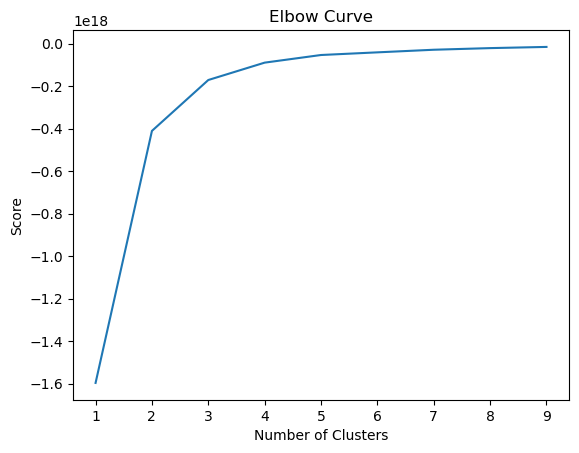

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow above peaks out at 3 before mainly plateauing. With this graph I will be using 3 clusters for now and depending on the results may re-run them with 4.

### K-means clustering

In [18]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [20]:
# Fit the k-means object to the data.

kmeans.fit(game_player_sub_nodup)

C:\Users\sjvai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [21]:
game_player_sub_nodup['clusters'] = kmeans.fit_predict(game_player_sub_nodup)

C:\Users\sjvai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sjvai\AppData\Local\Temp\ipykernel_21748\1775515224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_player_sub_nodup['clusters'] = kmeans.fit_predict(game_player_sub_nodup)


In [22]:
game_player_sub_nodup.head()

,game_id,team_id,team_goals,team_shots,team_hits,team_pim,team_giveaways,team_takeaways,team_blocked,clusters
0,2016020045,16,7,28,20.0,8,16.0,8.0,9.0,1
18,2016020045,4,4,27,30.0,6,12.0,9.0,11.0,1
36,2017020812,7,3,33,17.0,8,5.0,6.0,14.0,1
54,2017020812,24,4,34,16.0,6,7.0,4.0,14.0,1
72,2015020314,21,4,29,17.0,9,13.0,5.0,20.0,1


In [23]:
game_player_sub_nodup['clusters'].value_counts()

1    18410
0    16722
2    12300
Name: clusters, dtype: int64

### Scatterplots

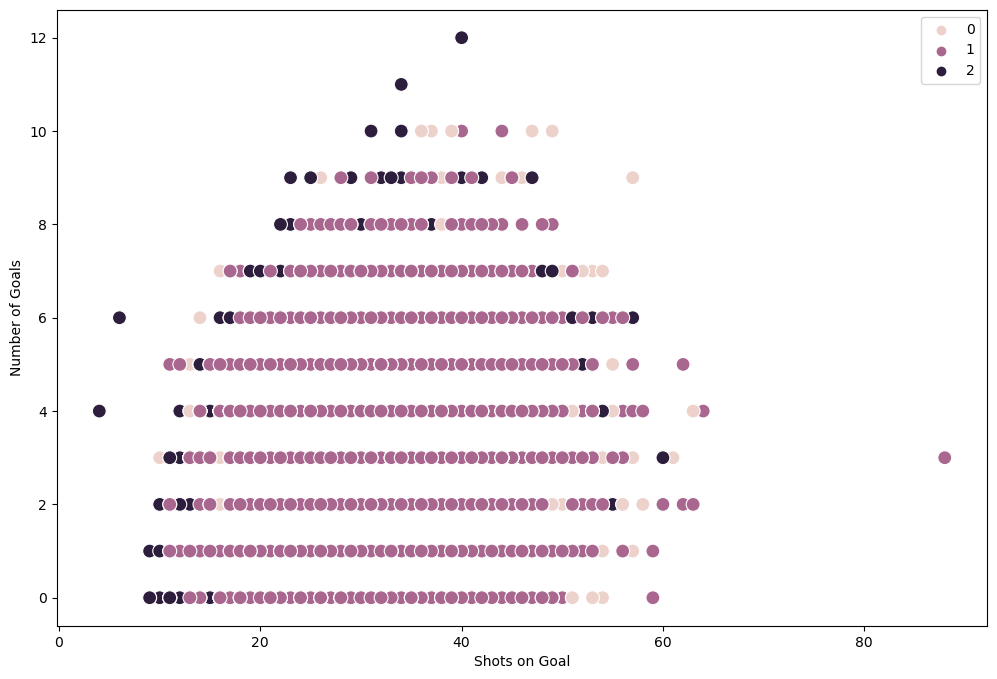

In [24]:
# Plot the clusters for the "team_shots" and "team_goals" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=game_player_sub_nodup['team_shots'], y=game_player_sub_nodup['team_goals'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Shots on Goal') # Label x-axis.
plt.ylabel('Number of Goals') # Label y-axis.
plt.show()

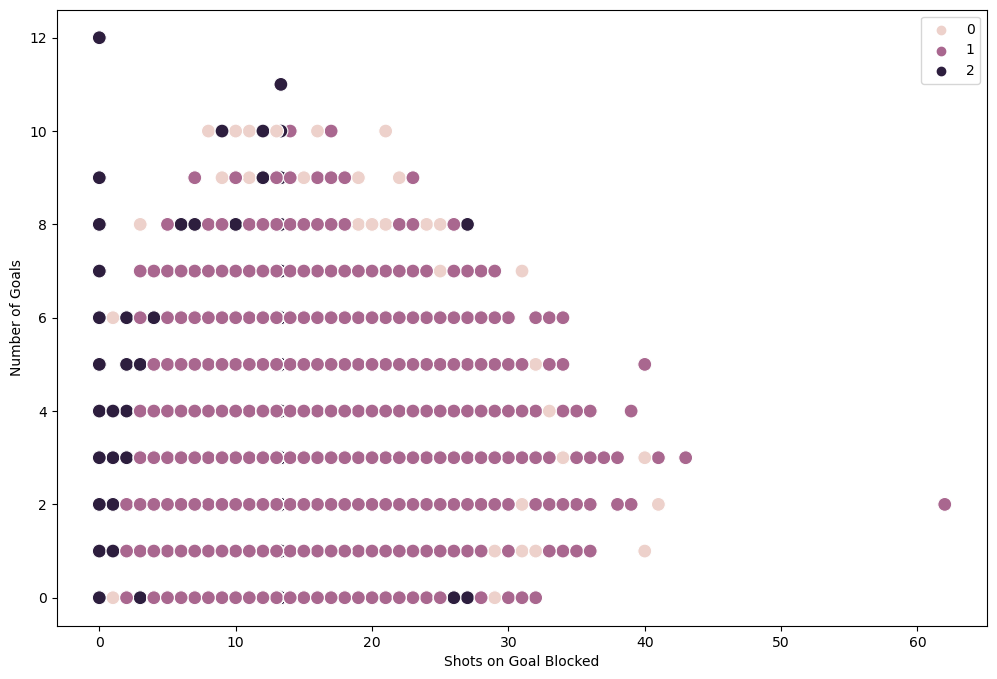

In [25]:
# Plot the clusters for the "team_blocked" and "team_goals" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=game_player_sub_nodup['team_blocked'], y=game_player_sub_nodup['team_goals'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Shots on Goal Blocked') # Label x-axis.
plt.ylabel('Number of Goals') # Label y-axis.
plt.show()

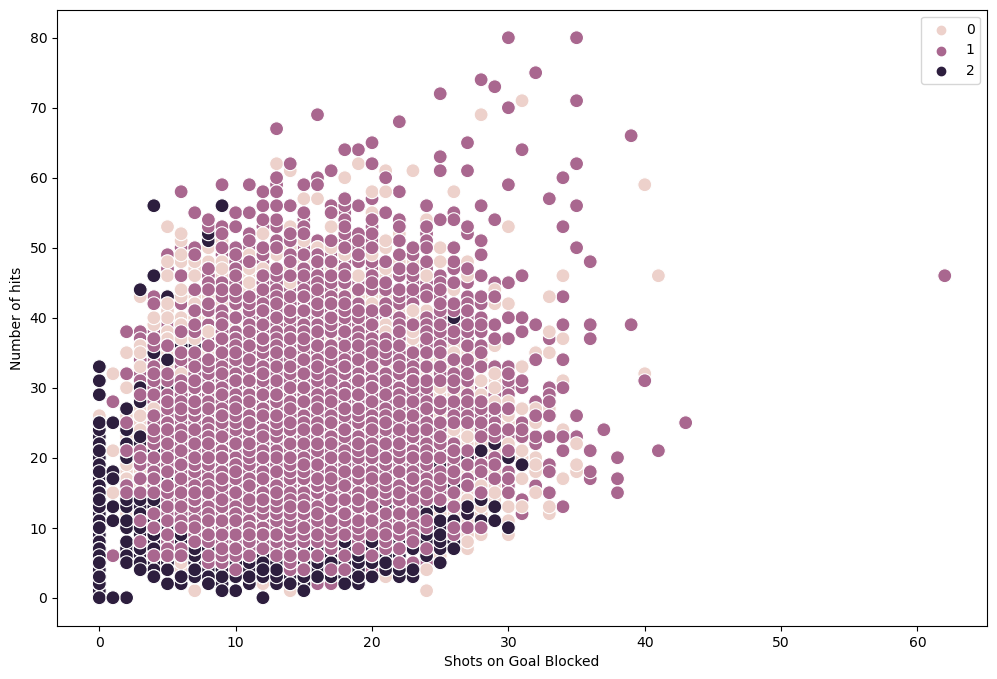

In [26]:
# Plot the clusters for the "team_blocked" and "team_hits" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=game_player_sub_nodup['team_blocked'], y=game_player_sub_nodup['team_hits'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Shots on Goal Blocked') # Label x-axis.
plt.ylabel('Number of hits') # Label y-axis.
plt.show()

### Conclusion

Going off of of the initial value counts of the clusters I was expecting to see a similar number of 1's and 0's since they were only off my 2000ish and then I was expecting to see a few of the 2's. I had this thought because the 1's were 38.8 percent, 0's were 35.25 percent, and the 2's were 25.9 percent of the counts. Once I saw the scatterplots I was surprised to see what looks like a lot more 1's than either of the other data points. The 1's also make up a vast majority of the middle sections on each of the scatterplots with the 0's and 2's making up the outside edges/outliers. This surprised me and I will be interested to see the numbers below for the details stats.

## Descriptive statistics

In [28]:
game_player_sub_nodup.loc[game_player_sub_nodup['clusters'] == 2, 'cluster'] = 'dark purple'
game_player_sub_nodup.loc[game_player_sub_nodup['clusters'] == 1, 'cluster'] = 'purple'
game_player_sub_nodup.loc[game_player_sub_nodup['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\sjvai\AppData\Local\Temp\ipykernel_21748\3531679228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_player_sub_nodup.loc[game_player_sub_nodup['clusters'] == 2, 'cluster'] = 'dark purple'


In [29]:
game_player_sub_nodup.groupby('cluster').agg({'team_goals':['mean', 'median'], 
                         'team_shots':['mean', 'median'], 
                         'team_hits':['mean', 'median'],
                          'team_blocked':['mean', 'median']})

team_goals        team_shots         team_hits         \
                  mean median       mean median       mean median   
cluster                                                             
dark purple   2.724797    3.0  28.333089   28.0  16.271549   21.0   
pink          2.751884    3.0  29.864430   30.0  21.500957   20.0   
purple        2.794677    3.0  30.687561   30.0  23.527648   23.0   

            team_blocked             
                    mean     median  
cluster                              
dark purple    10.945884  13.317352  
pink           13.587908  13.000000  
purple         14.426127  14.000000

These stats seeing them next to each other in number forms make me curious for other descriptive stats. I was expecting the 1's or the purple to be the middle of the numbers since the pinks/0's were on the higher end of the outliers than the other two stats. I am going to add in a max column to see if pink ends up with a higher max than the other two clusters.

In [30]:
game_player_sub_nodup.groupby('cluster').agg({'team_goals':['mean', 'median', 'max'], 
                         'team_shots':['mean', 'median', 'max'], 
                         'team_hits':['mean', 'median', 'max'],
                          'team_blocked':['mean', 'median', 'max']})

team_goals            team_shots             team_hits         \
                  mean median max       mean median max       mean median   
cluster                                                                     
dark purple   2.724797    3.0  12  28.333089   28.0  60  16.271549   21.0   
pink          2.751884    3.0  10  29.864430   30.0  63  21.500957   20.0   
purple        2.794677    3.0  10  30.687561   30.0  88  23.527648   23.0   

                  team_blocked                   
              max         mean     median   max  
cluster                                          
dark purple  56.0    10.945884  13.317352  31.0  
pink         71.0    13.587908  13.000000  41.0  
purple       80.0    14.426127  14.000000  62.0

Adding in the max surprises me with seeing pink being in the middle of both the other two clusters based on where we see the pink on all the scatterplots above. I would be curious to see if there is a way to see which teams make up looks like in each cluster to see if there is a way to look at where each of the teams are for each of the clusters. 